# Lista 1

## Imports

In [10]:
from __future__ import annotations
import re
import string

import pandas as pd
import matplotlib.pyplot as plt


## Questão 1

In [1]:
def validade_pass(password: str):
    if len(password) < 8:
        return False
    have_lowercase = False
    have_uppercase = False
    have_number = False
    have_special = False
    for character in password:
        if 'a' <= character <= 'z':
            have_lowercase = True
        elif 'A' <= character <= 'Z':
            have_uppercase = True
        elif '0' <= character <= '9':
            have_number = True
        else:
            have_special = True
    
    is_valid = have_lowercase and have_uppercase and have_number and have_special
    return is_valid

In [3]:
print(validade_pass('123dsad23132'))
print(validade_pass('123dsad23132#'))
print(validade_pass('12A3d2#'))
print(validade_pass('123dA2#'))
print(validade_pass('123dAaa2#'))

False
False
False
False
True


## Questão 2

In [251]:
def check_email(email):
    pattern = re.compile(r'([A-Za-z0-9]+[.-_])*[A-Za-z0-9]+@[A-Za-z0-9-]+(\.[A-Z|a-z]{2,})+')

    if re.fullmatch(pattern, email):
        return True
    return False 

In [252]:
print(check_email("gpss@ic.ufal.br"))
print(check_email("gps.@ic."))
print(check_email("gps.ic."))
print(check_email(".@gmail.com"))
print(check_email(".A@gmail.com"))
print(check_email("nome@gmail."))

True
False
False
False
False
False


## Questão 3

In [249]:
def get_metadata(apa_citation: str):
    authors = re.findall(r"[A-Z][a-z]+, [A-Z]\.(?: [A-Z]\.)?", apa_citation)
    year = re.search(r"([0-9]+)", apa_citation).group(0)
    title = re.search(r"(?<=\)\. )[A-Za-z :]+", apa_citation).group(0)
    publisher = re.search(r"(?<= )[A-Za-z :]+\.$", apa_citation).group(0)
    return authors, year, title, publisher

In [250]:
test_str = 'Manning, C. D., Manning, C. D., & Schutze, H. (1999). Foundations: of statistical natural language processing. MIT press.'
authors, year, title, publisher = get_metadata(test_str)
print(authors)
print(year)
print(title)
print(publisher)

['Manning, C. D.', 'Manning, C. D.', 'Schutze, H.']
1999
Foundations: of statistical natural language processing
MIT press.


## Questão 4

In [2]:
data = pd.read_csv('../datasets/website_classification.csv')

In [3]:
data['comprimento'] = data['cleaned_website_text'].apply(lambda x: len(x))

print("Comprimento dos textos:")
print(data['comprimento'])

Comprimento dos textos:
0       4848
1       4886
2       1969
3       9056
4       3449
        ... 
1403    4842
1404     140
1405    2961
1406    1490
1407    3698
Name: comprimento, Length: 1408, dtype: int64


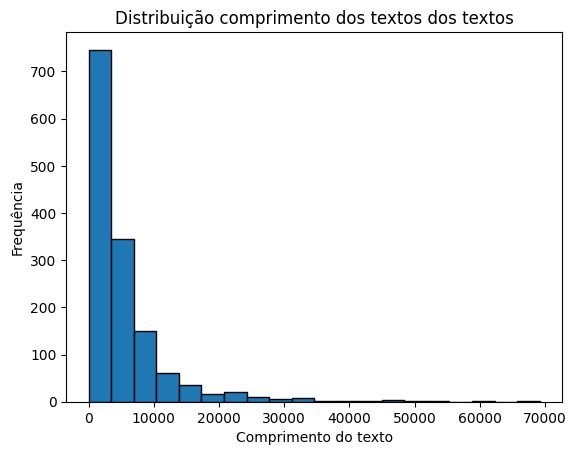

In [4]:
plt.hist(data['comprimento'], bins=20, edgecolor='black')
plt.xlabel('Comprimento do texto')
plt.ylabel('Frequência')
plt.title('Distribuição comprimento dos textos dos textos')

plt.show()

## Questão 5

In [11]:
preprocess_data = pd.read_csv('../datasets/website_classification.csv')

In [12]:
raw_text = preprocess_data.cleaned_website_text

In [13]:
def get_words(text: str, word_dict: dict):
    words = re.findall(r'[^ .,]+', text)
    final_words = []
    for word in words:
        to_insert = True
        if re.search(r'[0-9]', word) != None:
            to_insert = False
            
        word = word.translate(str.maketrans('', '', string.punctuation)).lower()
        
        if re.search(r'[^a-z]', word) != None:
            to_insert = False
        
        if to_insert:
            final_words.append(word)
            try:
                word_dict[word] += 1
            except:
                word_dict[word] = 0
    
    return final_words

In [8]:
def convert_entire_database(raw_data: list[str]):
    ret_dict = {}
    ret_words = []
    for text in raw_data:
        result = get_words(text, ret_dict)
        ret_words.append(result)
    return ret_dict, ret_words

In [14]:
all_dict, words_per_text = convert_entire_database(raw_text)

In [10]:
print(all_dict)

{'official': 371, 'site': 1507, 'good': 2613, 'hotel': 907, 'accommodation': 92, 'big': 996, 'saving': 97, 'destination': 284, 'worldwide': 179, 'browse': 282, 'review': 999, 'find': 2106, 'guarantee': 201, 'price': 842, 'budget': 170, 'lodging': 6, 'hotels': 378, 'special': 843, 'offer': 1397, 'package': 473, 'weekend': 167, 'break': 390, 'city': 922, 'deal': 689, 'cheap': 159, 'discount': 196, 'select': 826, 'language': 417, 'home': 2785, 'try': 692, 'search': 1626, 'connect': 413, 'traveller': 38, 'india': 1966, 'travel': 1441, 'talk': 469, 'community': 819, 'recommend': 194, 'flamborough': 2, 'boreland': 2, 'colvend': 2, 'catfield': 2, 'harberton': 1, 'warleggan': 1, 'inspiration': 98, 'trip': 331, 'spot': 246, 'winter': 279, 'wildlife': 102, 'beautiful': 261, 'snowy': 4, 'island': 410, 'bye': 51, 'work': 1683, 'want': 1153, 'spontechnaity': 0, 'tech': 394, 'drive': 448, 'vital': 42, 'value': 362, 'maximise': 2, 'homes': 21, 'guest': 323, 'love': 1041, 'property': 332, 'type': 506,

In [11]:
new_dict = {}
for i, key in enumerate(all_dict):
    new_dict[key] = i

def get_embedding(index_dict: dict, words: list[str], size: int):
    ret_vector = [0 for _ in range(size)]
    for word in words:
        ret_vector[index_dict[word]] += 1
    return ret_vector

dict_size = len(all_dict)
all_embeddings = []
for text in words_per_text:
    new_embedding = get_embedding(new_dict, text, dict_size)
    all_embeddings.append(new_embedding)

In [9]:
print("Vetor do texto número 16:")
print(all_embeddings[16])

Vetor do texto número 16:
[0, 1, 2, 18, 0, 0, 2, 3, 0, 1, 0, 6, 3, 0, 0, 0, 35, 1, 3, 1, 0, 0, 4, 0, 0, 1, 2, 0, 0, 1, 1, 0, 0, 0, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 5, 0, 0, 0, 1, 6, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 5, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 13, 0, 2, 3, 0, 5, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 4, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 4, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 6, 0, 0, 0, 0, 0, 0, 

In [10]:
new_dict = dict(sorted(all_dict.items(), key=lambda item: item[1], reverse=True))

In [11]:
print("As palavras mais frequentes são:")
print([k for k, _ in list(new_dict.items())[:10]])

As palavras mais frequentes são:
['news', 'new', 'world', 'read', 'home', 'december', 'good', 'free', 'video', 'time']


## Questão 6

##### Removendo stopwords

In [1]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\localhost\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\localhost\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
from nltk.corpus import stopwords

def remove_stop_words(text_arr):
    stop_words = set(stopwords.words('english'))

    novo_texto =[]
    for texto in text_arr:
        texto_sem_stopwords = [palavra for palavra in texto if palavra not in stop_words]    
        novo_texto.append(texto_sem_stopwords)
    
    return novo_texto

##### Rotulo POS

In [3]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\localhost\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [4]:
from nltk import pos_tag
from nltk.tokenize import word_tokenize

def add_rotulo_pos(text_arr):  
  text_arr_pos_rotulo = [pos_tag(word_tokenize(' '.join(array))) for array in text_arr]
  return text_arr_pos_rotulo

##### Stemização

In [5]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\localhost\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
from nltk.stem import PorterStemmer

def aplica_stemizacao(text_arr):  
  stemmer = PorterStemmer()
  text_array_stemmed = [[(stemmer.stem(token), pos) for token, pos in array] for array in text_arr]
  return text_array_stemmed


In [15]:
novo_texto = remove_stop_words(words_per_text)
texto_com_rotulo = add_rotulo_pos(novo_texto)
texto_stemizado = aplica_stemizacao(texto_com_rotulo)
print(texto_stemizado[0])
print(texto_stemizado[5])

[('offici', 'JJ'), ('site', 'NN'), ('good', 'JJ'), ('hotel', 'NN'), ('accommod', 'NN'), ('big', 'JJ'), ('save', 'VBG'), ('hotel', 'NN'), ('destin', 'NN'), ('worldwid', 'IN'), ('brows', 'JJ'), ('hotel', 'NN'), ('review', 'NN'), ('find', 'VBP'), ('guarante', 'NN'), ('good', 'JJ'), ('price', 'NN'), ('hotel', 'NN'), ('budget', 'NN'), ('lodg', 'VBG'), ('accommod', 'JJ'), ('hotel', 'NN'), ('hotel', 'NNS'), ('special', 'JJ'), ('offer', 'NN'), ('packag', 'NN'), ('special', 'JJ'), ('weekend', 'NN'), ('break', 'NN'), ('citi', 'NN'), ('break', 'NN'), ('deal', 'NN'), ('budget', 'NN'), ('cheap', 'JJ'), ('discount', 'NN'), ('save', 'VBG'), ('select', 'JJ'), ('languag', 'NN'), ('find', 'VB'), ('deal', 'JJ'), ('hotel', 'NN'), ('home', 'NN'), ('tri', 'NN'), ('search', 'NN'), ('connect', 'VBP'), ('travel', 'NN'), ('india', 'NN'), ('travel', 'NN'), ('talk', 'NN'), ('commun', 'NN'), ('recommend', 'VBP'), ('destin', 'NN'), ('flamborough', 'NN'), ('boreland', 'NN'), ('colvend', 'VBP'), ('catfield', 'VBN'), 

# Salvando os dados preprocessados num arquivo
- Foi salvo no arquivo `preprocessed_website_classification.csv`

In [19]:
import numpy as np

In [20]:
final_doc = []
for doc in texto_stemizado:
    new_line = [val for (val, _) in doc]
    new_text = ' '.join(new_line)
    final_doc.append(new_text)

new_df = preprocess_data.copy()
new_df.drop('cleaned_website_text', axis=1)

new_df['cleaned_website_text'] = np.array(final_doc)

In [22]:
new_df.to_csv('../datasets/preprocessed_website_classification.csv')

# Finalizado o salvamento

In [44]:
from collections import Counter

palavras = [palavra for array in novo_texto for palavra in array]
contagem = Counter(palavras)
palavras_mais_comuns = contagem.most_common(10)
print(palavras_mais_comuns)

[('news', 5323), ('new', 5080), ('world', 2903), ('read', 2899), ('home', 2786), ('december', 2699), ('good', 2614), ('free', 2568), ('video', 2484), ('time', 2448)]


In [45]:
palavras_stemizadas = [palavra for array in texto_stemizado for palavra in array]
contagem = Counter(palavras_stemizadas)
palavras_stemizadas_mais_comuns = contagem.most_common(10)
print(palavras_stemizadas_mais_comuns)

[(('news', 'NN'), 5323), (('new', 'JJ'), 5080), (('world', 'NN'), 2903), (('home', 'NN'), 2642), (('good', 'JJ'), 2611), (('free', 'JJ'), 2549), (('time', 'NN'), 2453), (('day', 'NN'), 2426), (('year', 'NN'), 2308), (('video', 'NN'), 2174)]


In [49]:
print(texto_com_rotulo[0])

[('official', 'JJ'), ('site', 'NN'), ('good', 'JJ'), ('hotel', 'NN'), ('accommodation', 'NN'), ('big', 'JJ'), ('saving', 'VBG'), ('hotel', 'NN'), ('destination', 'NN'), ('worldwide', 'IN'), ('browse', 'JJ'), ('hotel', 'NN'), ('review', 'NN'), ('find', 'VBP'), ('guarantee', 'NN'), ('good', 'JJ'), ('price', 'NN'), ('hotel', 'NN'), ('budget', 'NN'), ('lodging', 'VBG'), ('accommodation', 'JJ'), ('hotel', 'NN'), ('hotels', 'NNS'), ('special', 'JJ'), ('offer', 'NN'), ('package', 'NN'), ('special', 'JJ'), ('weekend', 'NN'), ('break', 'NN'), ('city', 'NN'), ('break', 'NN'), ('deal', 'NN'), ('budget', 'NN'), ('cheap', 'JJ'), ('discount', 'NN'), ('saving', 'VBG'), ('select', 'JJ'), ('language', 'NN'), ('find', 'VB'), ('deal', 'JJ'), ('hotel', 'NN'), ('home', 'NN'), ('try', 'NN'), ('search', 'NN'), ('connect', 'VBP'), ('traveller', 'NN'), ('india', 'NN'), ('travel', 'NN'), ('talk', 'NN'), ('community', 'NN'), ('recommend', 'VBP'), ('destination', 'NN'), ('flamborough', 'NN'), ('boreland', 'NN'), 

In [50]:
classes_gramaticais = [tag for array in texto_com_rotulo for _, tag in array]

contagem_classes_gramaticais = Counter(classes_gramaticais)

classes_gramaticais_mais_frequentes = contagem_classes_gramaticais.most_common(10)

print("As 10 classes gramaticais mais frequentes:")
print(classes_gramaticais_mais_frequentes)

As 10 classes gramaticais mais frequentes:
[('NN', 589911), ('JJ', 212926), ('VBP', 62770), ('NNS', 62108), ('RB', 22363), ('VB', 15454), ('VBD', 14078), ('VBG', 13951), ('IN', 12202), ('VBZ', 8951)]


## Questão 7

In [24]:
import random

random.seed(123)
selected_corpus = [random.choice(texto_stemizado) for _ in range(5)]

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics.pairwise import cosine_similarity
from itertools import combinations

In [42]:
corpus = []
for doc in selected_corpus:
    words = [word for word, _ in doc]
    corpus.append(' '.join(words))

In [46]:
cv = CountVectorizer(stop_words='english')
cv_tfidf = TfidfVectorizer(stop_words='english')

In [48]:
def get_similarity(obj):
    global corpus
    X = obj.fit_transform(corpus).toarray()
    cv_pairs = list(combinations(range(len(corpus)), 2))
    cv_combos = [(corpus[a_index], corpus[b_index]) for (a_index, b_index) in cv_pairs]

    cv_results = [cosine_similarity([X[a_index]], [X[b_index]]) for (a_index, b_index) in cv_pairs]
    return sorted(zip(cv_results, cv_combos), reverse=True)

In [49]:
cv_results = get_similarity(cv)
cv_tfidf_results = get_similarity(cv_tfidf)

In [54]:
def print_result(results):
    for res in results:
        for data in res:
            for dd in data:
                print(dd)
    

In [55]:
print_result(cv_results)

[0.2620075]
stream live tv sport fubotv free trial sport deport nfl nhl mba mlb basebal footbal soccer cycl watch stream ondemand demand live stream live tv abc cb fox nbc espn channel cabl dvr includ start watch free contract cancel anytim stream live tv sport devic anytim watch dvr channel love contract commit enjoy free trial stream live tv channel love start free cancel onlin anytim fubotv well cabl tv big save contract hidden fee cloud dvr includ free stream live demand favorit devic frequent ask question start free trial know offer free trial email start free channel love cancel onlin anytim start free cut cabl channel love channel cabl tv fubotv live sport tv love half cost similar cabl packag pay want cancel break problem hour free record want watch devic start free cancel onlin anytim fubotv fubotv servic broadcast live tv internet cabl requir watch favorit team network show news movi channel plu demand entertain includ tv seri watch soccer leagu live fubotv ye fubotv network 

In [57]:
print_result(cv_tfidf_results)

[0.18349399]
stream live tv sport fubotv free trial sport deport nfl nhl mba mlb basebal footbal soccer cycl watch stream ondemand demand live stream live tv abc cb fox nbc espn channel cabl dvr includ start watch free contract cancel anytim stream live tv sport devic anytim watch dvr channel love contract commit enjoy free trial stream live tv channel love start free cancel onlin anytim fubotv well cabl tv big save contract hidden fee cloud dvr includ free stream live demand favorit devic frequent ask question start free trial know offer free trial email start free channel love cancel onlin anytim start free cut cabl channel love channel cabl tv fubotv live sport tv love half cost similar cabl packag pay want cancel break problem hour free record want watch devic start free cancel onlin anytim fubotv fubotv servic broadcast live tv internet cabl requir watch favorit team network show news movi channel plu demand entertain includ tv seri watch soccer leagu live fubotv ye fubotv network

### Justificativa

Todos os pares de ambos os modelos (CountVectorizer e TF-IDF) são idênticos, por exceção do 5 e 6 que estão os dois trocados entre ambos.

A semelhança do primeiro par é observada por ambos os documentos se tratarem de eventos e de streaming de eventos, tanto que o primeiro documento fala de nfl e mlb, o primeiro sendo sobre futebol e o segundo sobre baseball; já no segundo documento há plataforma de streamings como facebook, tanto que pode ser observada as palavras streaming, live e broadcast.